In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# JSON 数据文件路径（请根据实际上传路径更换）
json_path = "version1.json"

# 示例 JSON 内容格式已知，读取 JSON 文件
with open(json_path, 'r', encoding='utf-8') as f:
    json_data = json.load(f)

In [6]:
raw_rewards =[]
dpo_rewards =[]
for d in json_data:
    raw_rewards.append(d['reward_raw'])
    dpo_rewards.append(d['reward_dpo'])

In [16]:
print(sum(raw_rewards)/len(raw_rewards))
print(sum(dpo_rewards)/len(dpo_rewards))

1.8323906860351562
3.2824549560546874


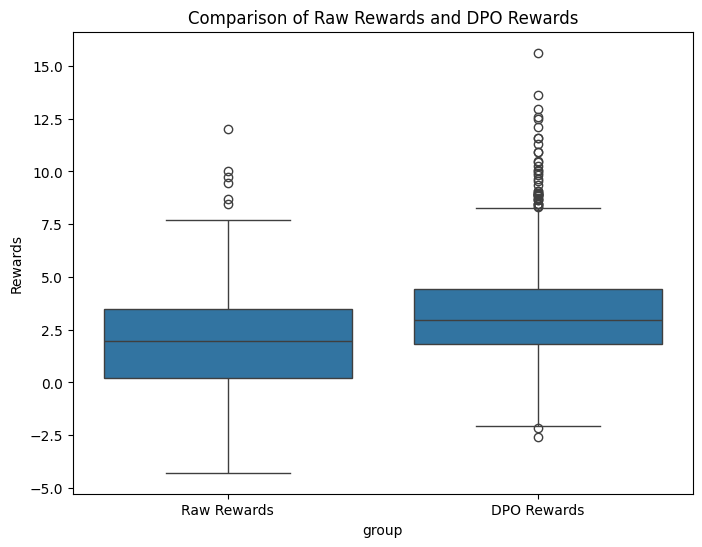

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame({
    'value': raw_rewards + dpo_rewards,
    'group': ['Raw Rewards'] * len(raw_rewards) + ['DPO Rewards'] * len(dpo_rewards)
})

# 绘制箱线图
plt.figure(figsize=(8, 6))
sns.boxplot(x='group', y='value', data=df)
# plt.boxplot([raw_rewards, dpo_rewards], labels=['Raw Rewards', 'DPO Rewards'])
plt.title('Comparison of Raw Rewards and DPO Rewards')
plt.ylabel('Rewards')
plt.show()

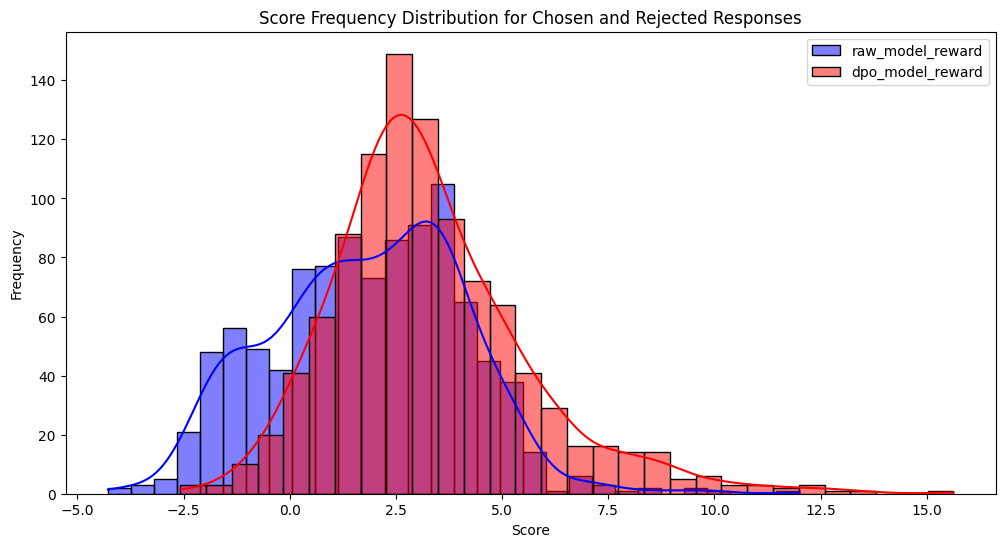

In [15]:
df_full = pd.DataFrame(json_data)
# 绘制频率分布图（直方图 + KDE）
plt.figure(figsize=(12, 6))
sns.histplot(df_full['reward_raw'], kde=True, color='blue', label='raw_model_reward', bins=30)
sns.histplot(df_full['reward_dpo'], kde=True, color='red', label='dpo_model_reward', bins=30)
plt.title("Score Frequency Distribution for Chosen and Rejected Responses")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [12]:
sorted_by_dpo_reward=sorted(json_data, key=lambda x: x['reward_dpo'], reverse=True)
sorted_by_raw_reward=sorted(json_data, key=lambda x: x['reward_raw'])
sorted_by_minus=sorted(json_data, key=lambda x: x['reward_raw'] - x['reward_dpo'])


In [13]:
# 保存排序后的数据到 JSON 文件
with open('json_file/sorted_by_dpo_reward.json', 'w', encoding='utf-8') as f:
    json.dump(sorted_by_dpo_reward, f, indent=4, ensure_ascii=False)
with open('json_file/sorted_by_raw_reward.json', 'w', encoding='utf-8') as f:
    json.dump(sorted_by_raw_reward, f, indent=4, ensure_ascii=False)
with open('json_file/sorted_by_minus.json', 'w', encoding='utf-8') as f:
    json.dump(sorted_by_minus, f, indent=4, ensure_ascii=False)

In [14]:
bingo=0
sum_data=0
for d in json_data:
    if d['reward_dpo'] > d['reward_raw']:
        bingo += 1
    sum_data += 1
print(bingo/sum_data)

0.72


In [17]:
print(bingo)

720
